# Week 9 Independent Lab: Inferential Statistics

**Author**: Brady Woods  
**Course**: BGEN632 Grad. Intro. to Python  
**Term**: Spring 2025  
**Date**: April 28, 2025  

This notebook contains code completing the week nine independent lab. It explores linearity, collinearity, homoskedasticity, independence, and normality.

#### Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import pearsonr, shapiro
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

#### Directory Setup

In [2]:
os.chdir("/Users/bradywoods/Desktop/week9labs/data")
os.getcwd() 

'/Users/bradywoods/Desktop/week9labs/data'

#### Reading in Data

In [5]:
ect_df = pd.read_csv("ect_data.txt", sep= "\t")

In [8]:
ect_df.head(2)

,attitude1_01,attitude1_02,attitude1_03,attitude1_04,intent1_01,intent1_02,intent1_03,intent1_04,peruse01,peruse02,peruse03,peruse04,satis01,satis02,satis03,satis04
0,6,6,6,6,6,6,6,6,6,4,5,5,5,5,5,5
1,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6


#### Setting up Regression

In [9]:
predictors = ["attitude1_01", "attitude1_02", "attitude1_03", "peruse01", "satis01"]

formula = "intent1_01 ~ " + " + ".join(predictors)

model = smf.ols(formula=formula, data=ect_df).fit()

In [10]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             intent1_01   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     45.10
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           8.52e-31
Time:                        17:30:02   Log-Likelihood:                -211.44
No. Observations:                 201   AIC:                             434.9
Df Residuals:                     195   BIC:                             454.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0146      0.352      2.886   

#### Checking Assumptions

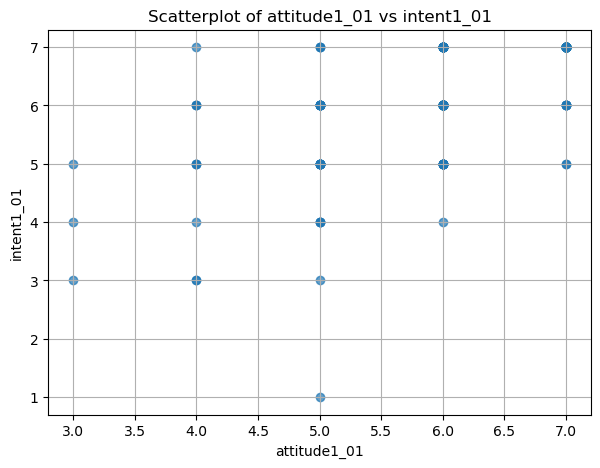

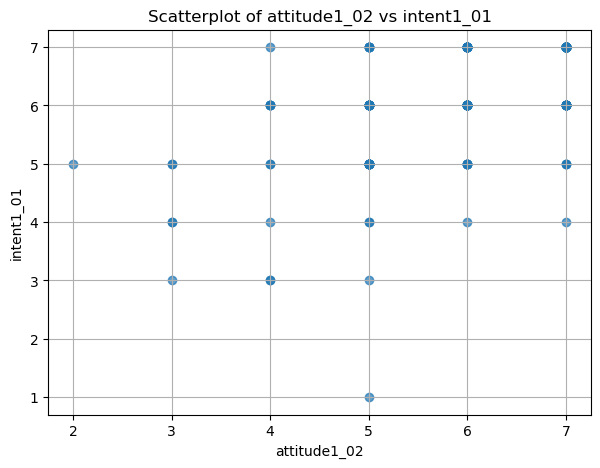

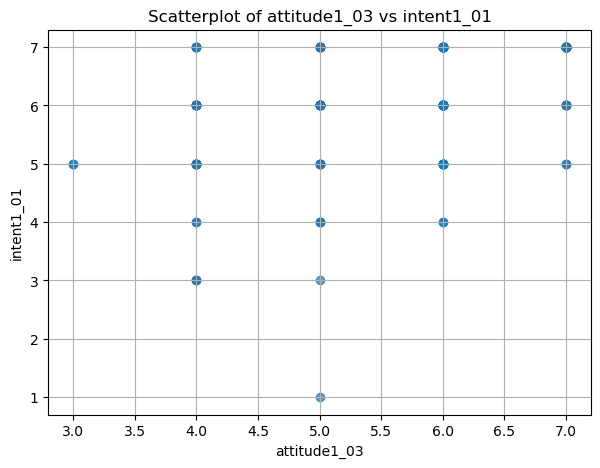

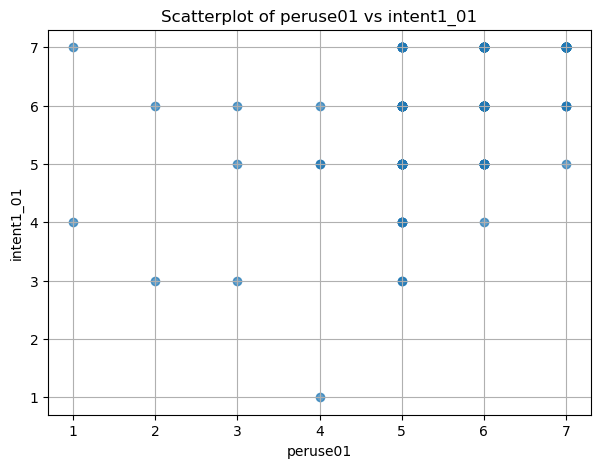

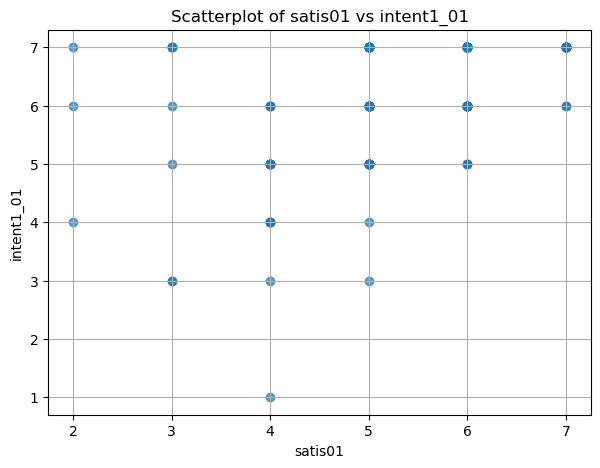

              attitude1_01  attitude1_02  attitude1_03  peruse01   satis01
attitude1_01      1.000000      0.781832      0.748347  0.576265  0.569608
attitude1_02      0.781832      1.000000      0.660611  0.480259  0.513672
attitude1_03      0.748347      0.660611      1.000000  0.453128  0.519945
peruse01          0.576265      0.480259      0.453128  1.000000  0.399931
satis01           0.569608      0.513672      0.519945  0.399931  1.000000


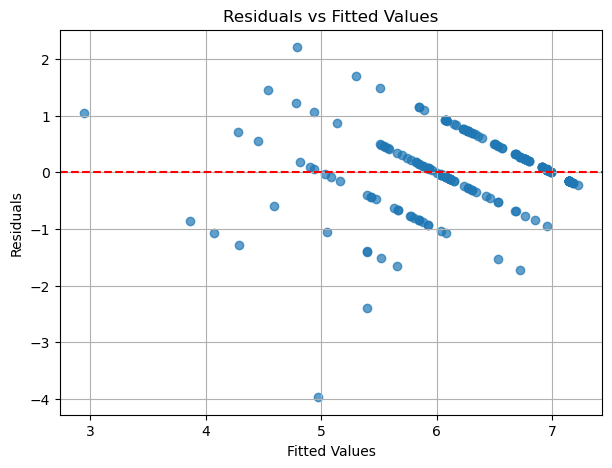

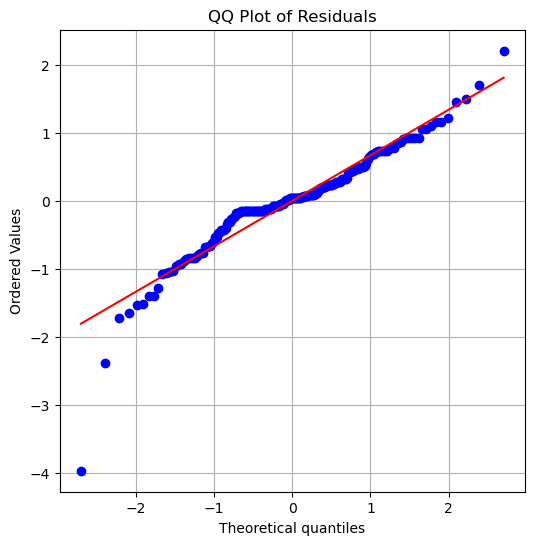


Shapiro-Wilk Test for Residuals:
Statistic=0.9223, p-value=0.0000
Residuals do NOT look normally distributed (reject H0).


In [13]:
for var in predictors:
    plt.figure(figsize=(7,5))
    plt.scatter(ect_df[var], ect_df["intent1_01"], alpha=0.7)
    plt.title(f"Scatterplot of {var} vs intent1_01")
    plt.xlabel(var)
    plt.ylabel("intent1_01")
    plt.grid(True)
    plt.show()

print(ect_df[predictors].corr())

fitted_vals = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(7,5))
plt.scatter(fitted_vals, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,6))
sts.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.grid(True)
plt.show()

stat, p = shapiro(residuals)
print(f"\nShapiro-Wilk Test for Residuals:")
print(f"Statistic={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("Residuals look normally distributed (fail to reject H0).")
else:
    print("Residuals do NOT look normally distributed (reject H0).")

#### Commentary on Assumptions
I think these graphs show that the data does not meet all of our assumptions. Most of our independent variables do not have a staggering correlation with each other. My area of concern is that the residuals are not normally distributed. They do look quite close, so I think in this case it would be okay to move forward. But if this was more of a business case situation I would dive down into why this is happening.

#### F and T Tests
Our F statistic of 45.10 with a p value less than 0.001 implies that the model itself is statistically significant and at least one independent variable predicts our output better than a model with no independent variables. Our T test reveals that all variables except for attitude1_03 is significant in predicting our output.

#### Two Significant Variables
"attitude1_01" is significant because a users attitude towards a system will increase their intention to use the system. Thus a higher attitude score will imply a better intention. Fostering this attitude is an opportunity for faster and more efficient adoption of this new system. "peruse01" is another significant variable. Put breifly, a higher sense of perceived usefulness will create a higher intention score. People will have a higher chance of inteding to use this new system if they believe it to be useful.

#### Model Equation
intent1_01 = 1.015 + 0.334(attitude1_01) + 0.156(attitude1_02) - 0.037(attitude1_03) + 0.232(peruse01) + 0.190(satis01)


#### Interpretation
Holding all other variables constant, the following is true:

A one-point increase in attitude1_01 is associated with a 0.334 increase in intent1_01.

A one-point increase in peruse01 is associated with a 0.232 increase in intent1_01.

attitude1_03 is not statistically significant and does not meaningfully impact the intention score.

This model explains 53.6% of the variance in the intention to use the system.